## ANS 7

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [2]:

df = load_breast_cancer()
X, y = df.data, df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("BaggingClassifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_bag))
print("Precision:", precision_score(y_test, y_pred_bag))
print("Recall:", recall_score(y_test, y_pred_bag))

print("\nAdaBoostClassifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Precision:", precision_score(y_test, y_pred_ada))
print("Recall:", recall_score(y_test, y_pred_ada))


BaggingClassifier:
Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.971830985915493

AdaBoostClassifier:
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465


## ANS 8

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score

In [4]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, 
                           n_redundant=10, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
 [[184   2]
 [  0  14]]
Precision: 0.875
Recall: 1.0
F1 Score: 0.9333333333333333


## ANS 9

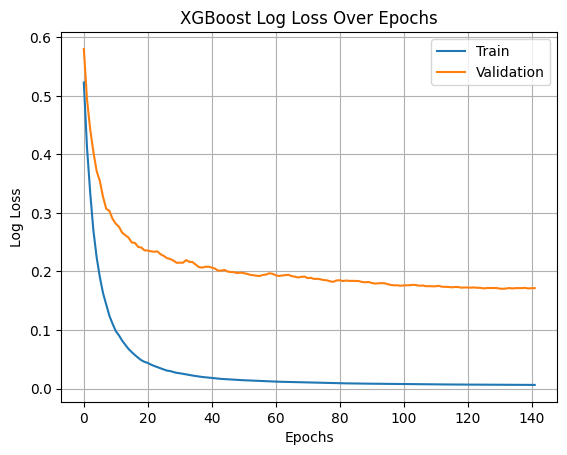

In [8]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

evals = [(dtrain, 'train'), (dval, 'validation')]
eval_results = {}

model = xgb.train(params, dtrain, num_boost_round=200, early_stopping_rounds=10, 
                  evals=evals, evals_result=eval_results, verbose_eval=False)

epochs = len(eval_results['train']['logloss'])
x_axis = range(epochs)

plt.plot(x_axis, eval_results['train']['logloss'], label='Train')
plt.plot(x_axis, eval_results['validation']['logloss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


## ANS 10

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

joblib.dump(model, "rf_model.joblib")

loaded_model = joblib.load("rf_model.joblib")
y_pred = loaded_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


## ANS 11

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

df = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Survived"]]
df = df.dropna()

X = pd.get_dummies(df.drop("Survived", axis=1), drop_first=True)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7622377622377622
